# Scaling

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import wrangle
import seaborn as sns

#visulization settings
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.style as style 
style.available
style.use('seaborn-notebook') #sets the size of the charts
style.use('seaborn-colorblind') #sets color of charts

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can .

In [2]:
train, validate, test = wrangle.wrangle_telco() 

In [3]:
train.shape, validate.shape, test.shape

((949, 3), (407, 3), (339, 3))

In [4]:
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
7501-IWUNG,73.80,61,4616.05
1303-SRDOK,69.05,55,3842.60
3967-VQOGC,24.90,67,1680.25
3777-XROBG,19.55,58,1079.65
5075-JSDKI,24.45,59,1493.10


<AxesSubplot:>

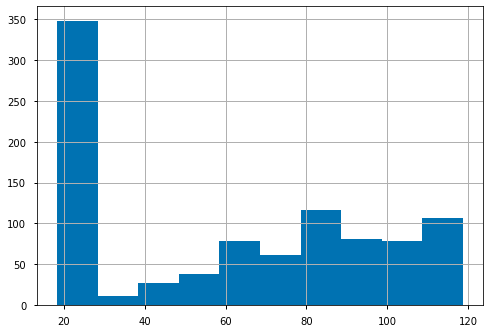

In [5]:
train.monthly_charges.hist()

In [6]:
train.monthly_charges.min()

18.4

In [7]:
train.monthly_charges.max()

118.65

<AxesSubplot:>

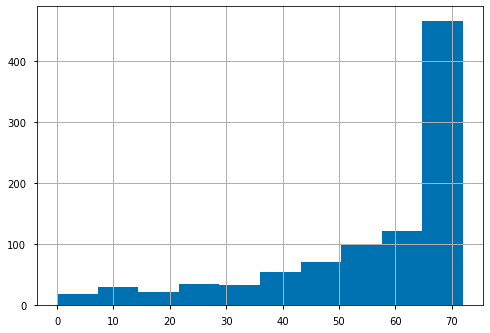

In [8]:
train.tenure.hist()

In [9]:
train.tenure.min()

0

In [10]:
train.tenure.max()

72

<AxesSubplot:>

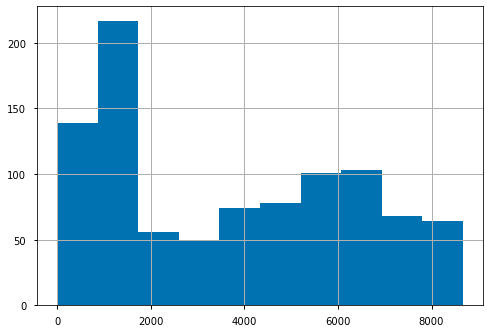

In [11]:
train.total_charges.hist()

#### Scaling
- Do the 3 Step sklearn API:
    - Make the thing (Make a scaler object
    - Fit the thing (on the train data)
    - Use the thing

In [12]:
#Make the thing
scaler = sklearn.preprocessing.MinMaxScaler()

In [13]:
#We fit on the training data
#in a way, we treat our scalers like our ML models
# we onlu .fit on training data
scaler.fit(train[['monthly_charges']])

MinMaxScaler()

In [14]:
scaled = scaler.fit_transform(train[['monthly_charges']])
scaled

array([[0.55261845],
       [0.50523691],
       [0.06483791],
       [0.01147132],
       [0.06034913],
       [0.61745636],
       [0.19800499],
       [0.00698254],
       [0.42892768],
       [0.66533666],
       [0.06733167],
       [0.86633416],
       [0.36758105],
       [0.8798005 ],
       [0.91072319],
       [0.60648379],
       [0.00798005],
       [0.80897756],
       [0.00997506],
       [0.02244389],
       [0.17306733],
       [0.7915212 ],
       [0.41496259],
       [0.61546135],
       [0.0234414 ],
       [0.81446384],
       [0.06134663],
       [0.34014963],
       [0.01695761],
       [0.39052369],
       [0.54962594],
       [0.89376559],
       [0.46034913],
       [0.41097257],
       [0.86882793],
       [0.55012469],
       [0.57905237],
       [0.57107232],
       [0.05835411],
       [0.3755611 ],
       [0.93017456],
       [0.66882793],
       [0.02593516],
       [0.71870324],
       [0.02044888],
       [0.01745636],
       [0.90922693],
       [0.620

In [16]:
#you can make a new 'scaled' column in original dataframe if you wish
train['monthly_charges_scaled']  = scaled
train.head()

,monthly_charges,tenure,total_charges,monthly_charges_scaled
customer_id,,,,
7501-IWUNG,73.80,61,4616.05,0.552618
1303-SRDOK,69.05,55,3842.60,0.505237
3967-VQOGC,24.90,67,1680.25,0.064838
3777-XROBG,19.55,58,1079.65,0.011471
5075-JSDKI,24.45,59,1493.10,0.060349


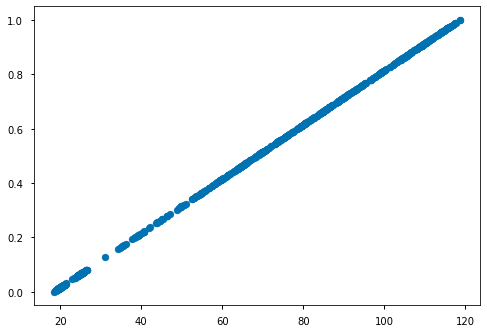

In [17]:
plt.scatter(train.monthly_charges, scaled)


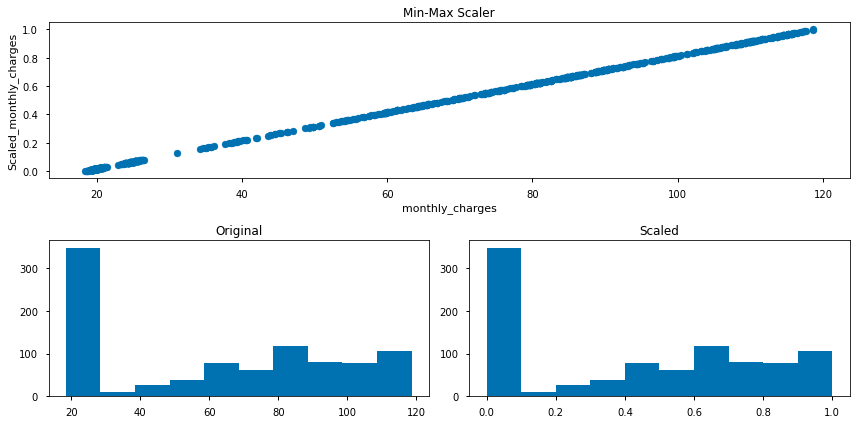

In [18]:
#Ravinders way to show differnt kinds of plots put togehter
fig = plt.figure(figsize = (12,6))

gs = plt.GridSpec(2,2)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

ax1.scatter(train.monthly_charges, scaled)
ax1.set(xlabel = 'monthly_charges', ylabel = 'Scaled_monthly_charges', title = 'Min-Max Scaler')

ax2.hist(train.monthly_charges)
ax2.set(title = 'Original')

ax3.hist(scaled)
ax3.set(title = 'Scaled')
plt.tight_layout();


In [19]:
#function for the cool visualization
def visualize_scaled_date(scaler, scaler_name, feature):
    scaled = scaler.fit_transform(train[[feature]])
    fig = plt.figure(figsize = (12,6))

    gs = plt.GridSpec(2,2)

    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[1,1])

    ax1.scatter(train[[feature]], scaled)
    ax1.set(xlabel = feature, ylabel = 'Scaled_' + feature, title = scaler_name)

    ax2.hist(train[[feature]])
    ax2.set(title = 'Original')

    ax3.hist(scaled)
    ax3.set(title = 'Scaled')
    plt.tight_layout();

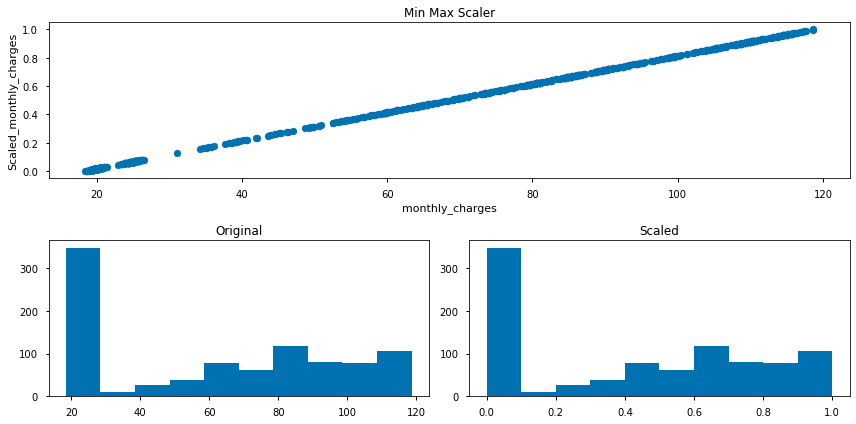

In [20]:
visualize_scaled_date(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', 'monthly_charges')


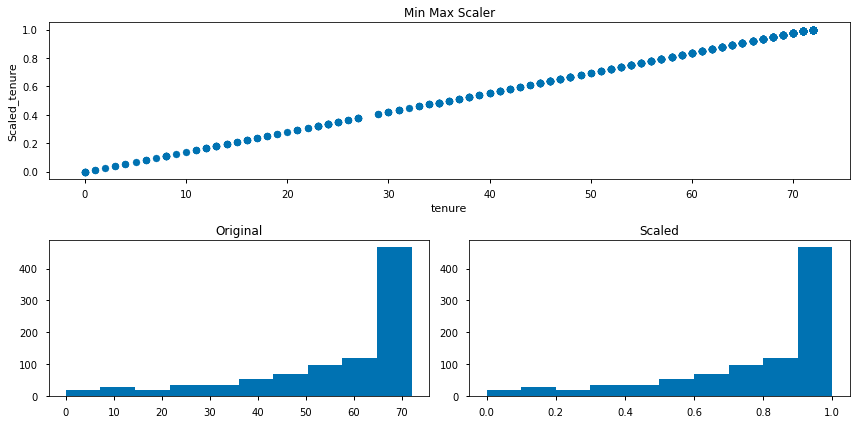

In [21]:
visualize_scaled_date(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', 'tenure')


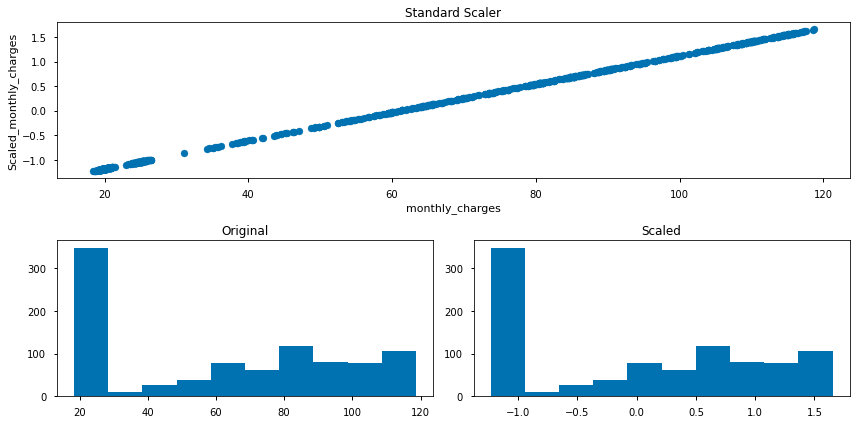

In [22]:
visualize_scaled_date(sklearn.preprocessing.StandardScaler(), 'Standard Scaler', 'monthly_charges')


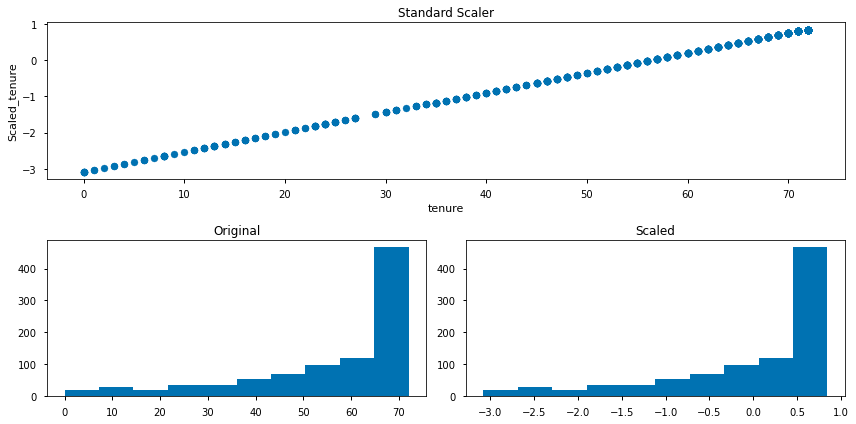

In [23]:
visualize_scaled_date(sklearn.preprocessing.StandardScaler(), 'Standard Scaler', 'tenure')


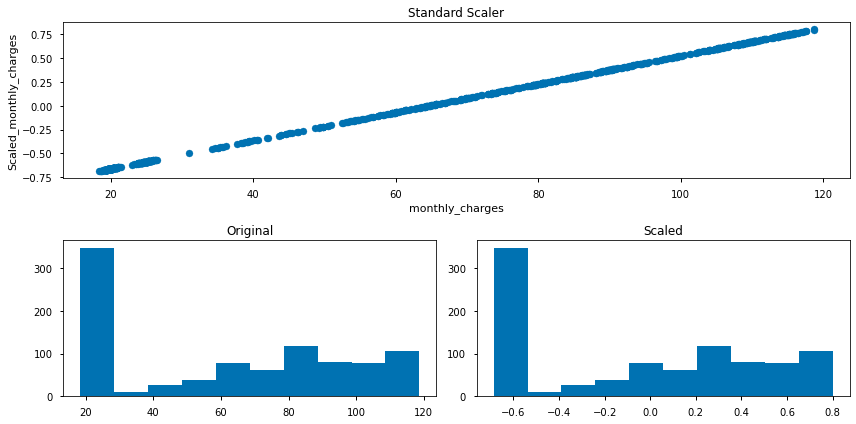

In [24]:
visualize_scaled_date(sklearn.preprocessing.RobustScaler(), 'Standard Scaler', 'monthly_charges')


### Min-Max Scaling

In [ ]:
plt.figure(figsize=(14, 11))
plt.suptitle('Scaled Vs Not Scaled')

#scaled
plt.subplot(231)
sns.histplot(data=train_scaled, x='monthly_charges')
plt.title('Scaled Monthly Charges')

plt.subplot(232)
sns.histplot(data=train_scaled, x='tenure')
plt.title('Scaled Tenure')

plt.subplot(233)
sns.histplot(data=train_scaled, x='total_charges')
plt.title('Scaled Total Charges')

#not scaled
plt.subplot(234)
sns.histplot(data=train, x='monthly_charges')
plt.title('Not Scaled Monthly Charges')

plt.subplot(235)
sns.histplot(data=train, x='tenure')
plt.title('Not Scaled Tenure')

plt.subplot(236)
sns.histplot(data=train, x='total_charges')
plt.title('Not Scaled Total Charges')

plt.subplots_adjust(hspace=0.4)

### Standard Scaler

In [ ]:
train2, validate2, test2 = wrangle.wrangle_telco()

In [ ]:
#make the thing
scaler = sklearn.preprocessing.StandardScaler()
#We fit on the training data
#in a way, we treat our scalers like our ML models
# we onlu .fit on training data
scaler.fit(train2)


In [ ]:
train2_scaled = scaler.transform(train2)
validate2_scaled = scaler.transform(validate2)
test2_scaled = scaler.transform(test2)

In [ ]:
train2_scaled[0:5]

In [ ]:
#turn the numpy arrays into dataframes
train2_scaled = pd.DataFrame(train2_scaled, columns=train2.columns)
validate2_scaled = pd.DataFrame(validate2_scaled, columns=train2.columns)
test2_scaled = pd.DataFrame(test2_scaled, columns=train2.columns)

In [ ]:
#plot the things

plt.figure(figsize=(14, 11))
plt.suptitle('Standard Scaled Vs Not Scaled')

#scaled
plt.subplot(231)
sns.histplot(data=train2_scaled, x='monthly_charges')
plt.title('Scaled Monthly Charges')

plt.subplot(232)
sns.histplot(data=train2_scaled, x='tenure')
plt.title('Scaled Tenure')

plt.subplot(233)
sns.histplot(data=train2_scaled, x='total_charges')
plt.title('Scaled Total Charges')

#not scaled
plt.subplot(234)
sns.histplot(data=train2, x='monthly_charges')
plt.title('Not Scaled Monthly Charges')

plt.subplot(235)
sns.histplot(data=train2, x='tenure')
plt.title('Not Scaled Tenure')

plt.subplot(236)
sns.histplot(data=train2, x='total_charges')
plt.title('Not Scaled Total Charges')

plt.subplots_adjust(hspace=0.4)

#### The only aspect that changes is the scale, not the structure.

### Robust Scaler

In [ ]:
train3, validate3, test3 = wrangle.wrangle_telco()


In [ ]:
#make the thing
scaler = sklearn.preprocessing.StandardScaler()
#We fit on the training data
#in a way, we treat our scalers like our ML models
# we onlu .fit on training data
scaler.fit(train3)


In [ ]:
train3_scaled = scaler.transform(train3)
validate3_scaled = scaler.transform(validate3)
test3_scaled = scaler.transform(test3)

In [ ]:
train3_scaled[0:5]

In [ ]:
#turn the numpy arrays into dataframes
train3_scaled = pd.DataFrame(train3_scaled, columns=train2.columns)
validate3_scaled = pd.DataFrame(validate3_scaled, columns=train2.columns)
test3_scaled = pd.DataFrame(test3_scaled, columns=train2.columns)

In [ ]:
#plot the things


plt.figure(figsize=(14, 11))
plt.suptitle('Robust Scaled Vs Not Scaled')

#scaled
plt.subplot(231)
sns.histplot(data=train3_scaled, x='monthly_charges')
plt.title('Scaled Monthly Charges')

plt.subplot(232)
sns.histplot(data=train3_scaled, x='tenure')
plt.title('Scaled Tenure')

plt.subplot(233)
sns.histplot(data=train3_scaled, x='total_charges')
plt.title('Scaled Total Charges')

#not scaled
plt.subplot(234)
sns.histplot(data=train3, x='monthly_charges')
plt.title('Not Scaled Monthly Charges')

plt.subplot(235)
sns.histplot(data=train3, x='tenure')
plt.title('Not Scaled Tenure')

plt.subplot(236)
sns.histplot(data=train3, x='total_charges')
plt.title('Not Scaled Total Charges')

plt.subplots_adjust(hspace=0.4)

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [ ]:
train4, validate4, test4 = wrangle.wrangle_telco()

In [ ]:
#make the thing
scaler = sklearn.preprocessing.StandardScaler()
#We fit on the training data
#in a way, we treat our scalers like our ML models
# we onlu .fit on training data
scaler.fit(train4)

### .inverse_transform

In [ ]:
train4_scaled = scaler.inverse_transform(train4)
validate4_scaled = scaler.inverse_transform(validate4)
test4_scaled = scaler.inverse_transform(test4)

In [ ]:
train4_scaled[0:5]

In [ ]:
#turn the numpy arrays into dataframes
train4_inverse = pd.DataFrame(train3_scaled, columns=train2.columns)
validate4_inverse = pd.DataFrame(validate3_scaled, columns=train2.columns)
test4_inverse = pd.DataFrame(test3_scaled, columns=train2.columns)

In [ ]:
#plot the things


plt.figure(figsize=(14, 11))
plt.suptitle('Inverse Scaled Vs Scaled')

#scaled
plt.subplot(231)
sns.histplot(data=train4_inverse, x='monthly_charges')
plt.title('Inverse Scaled Monthly Charges')

plt.subplot(232)
sns.histplot(data=train4_inverse, x='tenure')
plt.title('Inverse Scaled Tenure')

plt.subplot(233)
sns.histplot(data=train4_inverse, x='total_charges')
plt.title('Inverse Scaled Total Charges')

#not scaled
plt.subplot(234)
sns.histplot(data=train3_scaled, x='monthly_charges')
plt.title('Scaled Monthly Charges')

plt.subplot(235)
sns.histplot(data=train3_scaled, x='tenure')
plt.title('Scaled Tenure')

plt.subplot(236)
sns.histplot(data=train3_scaled, x='total_charges')
plt.title('Scaled Total Charges')

plt.subplots_adjust(hspace=0.4)

In [25]:
#review

train.head()

,monthly_charges,tenure,total_charges,monthly_charges_scaled
customer_id,,,,
7501-IWUNG,73.80,61,4616.05,0.552618
1303-SRDOK,69.05,55,3842.60,0.505237
3967-VQOGC,24.90,67,1680.25,0.064838
3777-XROBG,19.55,58,1079.65,0.011471
5075-JSDKI,24.45,59,1493.10,0.060349


In [26]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaled = scaler.fit_transform(train[['monthly_charges', 'tenure']])
scaled

array([[0.55261845, 0.84722222],
       [0.50523691, 0.76388889],
       [0.06483791, 0.93055556],
       ...,
       [0.06683292, 1.        ],
       [0.90024938, 0.63888889],
       [0.01546135, 0.52777778]])

In [27]:
scaled_df = pd.DataFrame(scaled, index = train.index, columns = ['monthly_charges', 'tenure'])


In [28]:
scaler.inverse_transform(scaled_df)


array([[ 73.8 ,  61.  ],
       [ 69.05,  55.  ],
       [ 24.9 ,  67.  ],
       ...,
       [ 25.1 ,  72.  ],
       [108.65,  46.  ],
       [ 19.95,  38.  ]])

In [29]:
scaled_df = pd.DataFrame(scaler.inverse_transform(scaled), index = train.index, columns = ['monthly_charges', 'tenure'])


### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (949). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


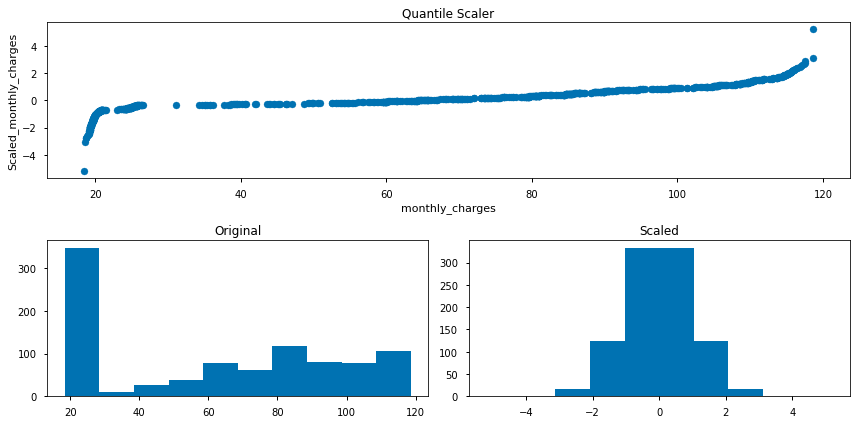

In [30]:
visualize_scaled_date(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', 'monthly_charges')


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (949). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


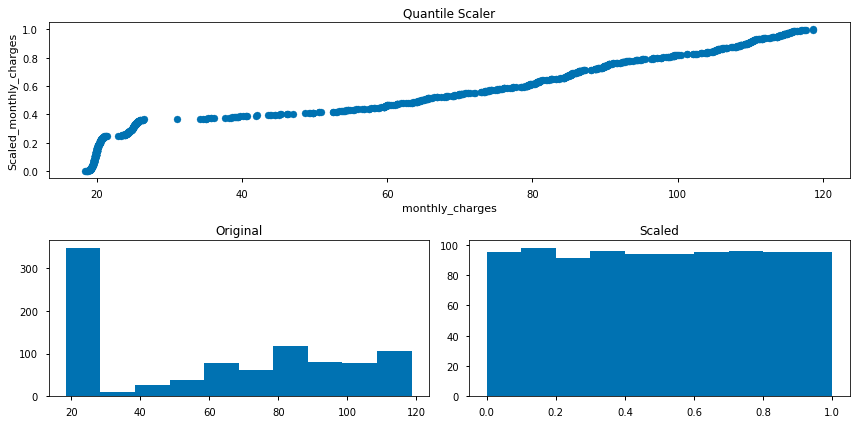

In [31]:
#take off normal

visualize_scaled_date(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scaler', 'monthly_charges')


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (949). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


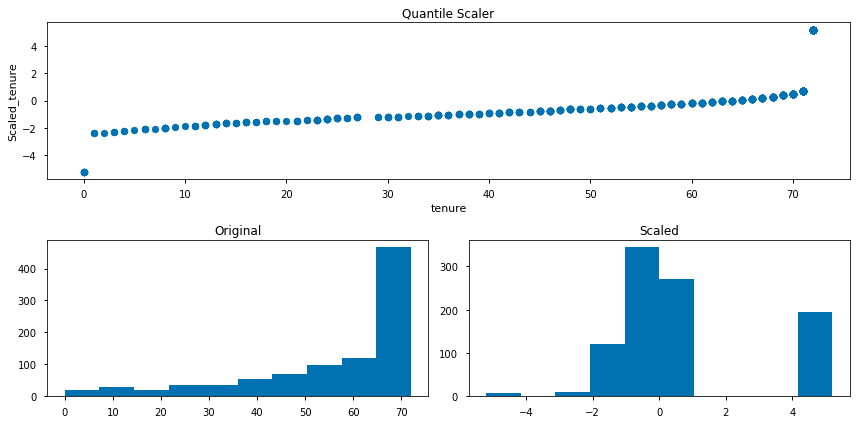

In [32]:
visualize_scaled_date(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', 'tenure')


### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [ ]:
# The scaled data turns into a big block

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [34]:
def Standard_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs
    """

    scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [33]:
def Min_Max_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs 
    """
    scaler = sklearn.preprocessing.MinMaxScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [35]:
X_train = train[['monthly_charges', 'tenure']]
X_validate = test[['monthly_charges', 'tenure']]
X_test = test[['monthly_charges', 'tenure']]

In [36]:
# Use the Standard_Scaler Function defined above

scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Standard_Scaler(X_train, X_validate, X_test)

X_train_scaled.head()

,monthly_charges,tenure
customer_id,,
7501-IWUNG,0.361757,0.245562
1303-SRDOK,0.225110,-0.081509
3967-VQOGC,-1.044987,0.572634
3777-XROBG,-1.198894,0.082026
5075-JSDKI,-1.057932,0.136538
